# **Shivam Krishna Mishra 20230802060 Lab 06**

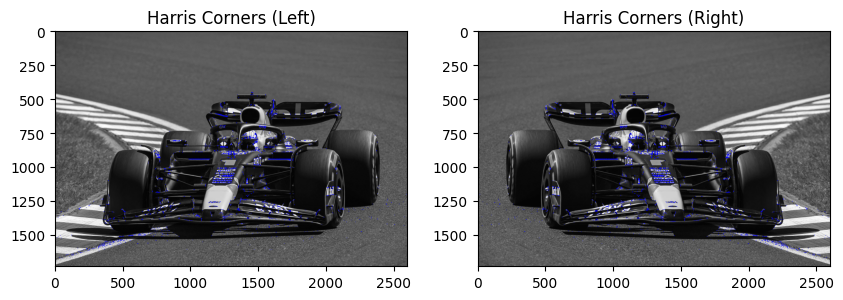

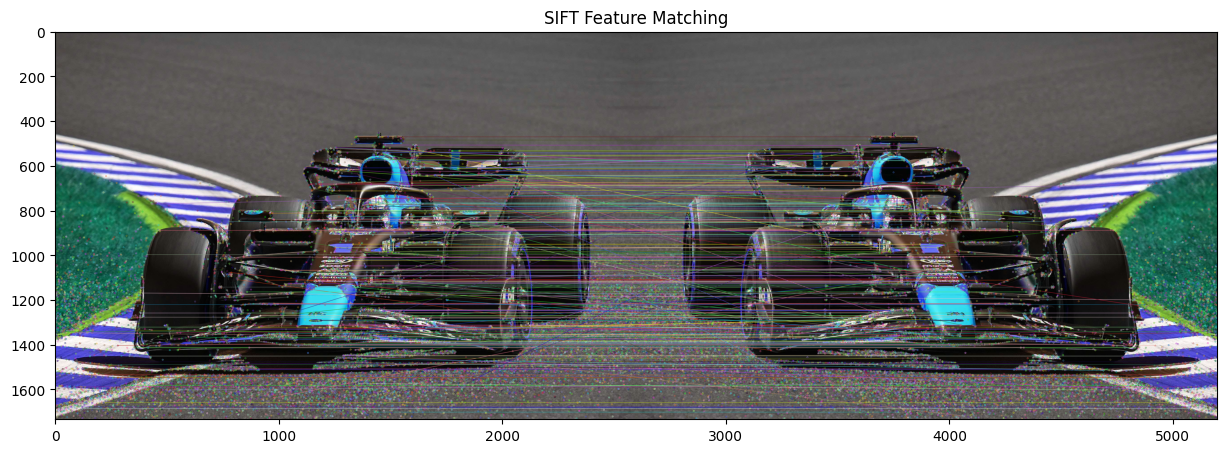

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# STEP 1: Load Left and Right Images
# -------------------------------
left = cv2.imread("/content/car.jpg")
right = cv2.imread("/content/car1.jpg")

# Check if images loaded
if left is None or right is None:
    print("Error: Check image paths!")
    # The exit() call here might not terminate the cell immediately in all environments,
    # leading to the subsequent cvtColor error if the images are indeed None.
    # For a robust fix, ensure images are re-uploaded to /content/.
    exit()

left_gray = cv2.cvtColor(left, cv2.COLOR_BGR2GRAY)
right_gray = cv2.cvtColor(right, cv2.COLOR_BGR2GRAY)

# -----------------------------------------------------
# PART 1: Harris Corner Detection
# -----------------------------------------------------
def harris_corner(img_gray):
    img_float = np.float32(img_gray)
    harris = cv2.cornerHarris(img_float, blockSize=2, ksize=3, k=0.04)
    harris = cv2.dilate(harris, None)
    # Corrected typo: cvv2.cvtColor -> cv2.cvtColor
    img_color = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)
    img_color[harris > 0.01 * harris.max()] = [0, 0, 255]
    return img_color

harris_left = harris_corner(left_gray)
harris_right = harris_corner(right_gray)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1); plt.imshow(harris_left); plt.title("Harris Corners (Left)")
plt.subplot(1, 2, 2); plt.imshow(harris_right); plt.title("Harris Corners (Right)")
plt.show()

# -----------------------------------------------------
# PART 2: SIFT Feature Detection + Matching
# -----------------------------------------------------
sift = cv2.SIFT_create()

keyL, descL = sift.detectAndCompute(left_gray, None)
keyR, descR = sift.detectAndCompute(right_gray, None)

# FLANN Matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(descL, descR, k=2)

# Lowe ratio test
good_matches = []
ptsL = []
ptsR = []

for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)
        ptsL.append(keyL[m.queryIdx].pt)
        ptsR.append(keyR[m.trainIdx].pt)

ptsL = np.int32(ptsL)
ptsR = np.int32(ptsR)

# Draw Matches
match_img = cv2.drawMatches(left, keyL, right, keyR, good_matches, None)

plt.figure(figsize=(15, 8))
plt.imshow(match_img)
plt.title("SIFT Feature Matching")
plt.show()